<a href="https://colab.research.google.com/github/rkdwodms/Data-analysis/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사용변수
- SalePrice: 우리가 예측해야 하는 타겟값으로 주택판매가격(달러)
- LotArea: 집과 마당의 사이즈(square feet)
- GrLivArea: 지상 생활면적(square feet)

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
import pandas as pd
# 주택가격 데이터 불러오기

df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/HousePrice_train.csv')
df
df_t = pd.read_csv('/gdrive/My Drive/Colab Notebooks/HousePrice_test.csv')

In [6]:
df.head()
df_t.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,...,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,...,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# 집 마당, 및 생활면적에 따른 가격 예측하기(tabular data)

df = df[['GrLivArea', 'LotArea', 'SalePrice']]
df_t = df_t[['GrLivArea', 'LotArea']]

주택 판매 가격을 예측하기 위해 1. 기존경험을 바탕으로 2. 통계정보를 바탕으로 3.기준모델을 이용하여 수행이 가능하다. 일단, 기존 경험을 바탕으로 예측하는 것은 분석가의 편견에 따른 오류에 빠질 수 있다. 그렇기에 우리는 2,3번을 이용해 볼 것이다. 


In [8]:
# 2. 통계정보 : 최소, 최대, 평균, 중앙값

df['SalePrice'].min(),df['SalePrice'].max(),df['SalePrice'].mean(),df['SalePrice'].median()

(34900, 755000, 180921.19589041095, 163000.0)

In [9]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

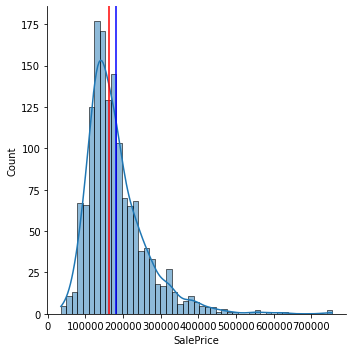

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

## SalePrice의 확률밀도함수
sns.displot(df['SalePrice'], kde=True)

## 평균과, 중간값 수직선
plt.axvline(df['SalePrice'].mean(), color='blue')
plt.axvline(df['SalePrice'].median(), color='red');

예측 방법으로 가장 간단하고 직관적인 방법은 평균 혹은 중간값을 이용하는 것도 좋다.


In [11]:
# 3. 기준모델(Base Model) : 최소한의 성능을 나타내는 기준이 되는 모델
# 분류 : 타겟의 최빈 클래스 / 회귀 : 타겟의 평균값 / 시계열회귀 : 이전 타임스탬프 값

basemd = df['SalePrice'].mean()
error = basemd - df['SalePrice']
error


0      -27578.80411
1        -578.80411
2      -42578.80411
3       40921.19589
4      -69078.80411
           ...     
1455     5921.19589
1456   -29078.80411
1457   -85578.80411
1458    38796.19589
1459    33421.19589
Name: SalePrice, Length: 1460, dtype: float64

In [12]:
# MAE 평가지표를 이용하여 모델의 성능을 확인해보자

mae = mean_absolute_error = error.abs().mean()
mae

# res = 약 57434 : 이 모델은 평균적으로 57434정도 잘못 예측하고 있다. 
basemd

180921.19589041095

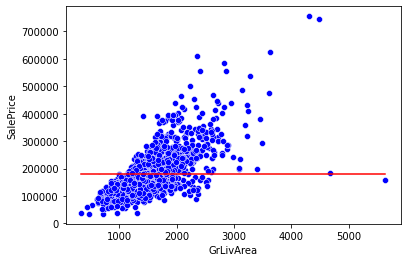

In [13]:
#시각화를 통해 확인해보자

x = df['GrLivArea']
y = df['SalePrice']

predict = df['SalePrice'].mean()
errors = predict - df['SalePrice']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

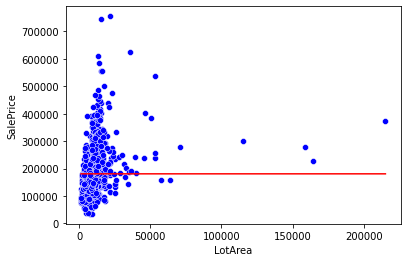

In [14]:
x = df['LotArea']
y = df['SalePrice']

predict = df['SalePrice'].mean()
errors = predict - df['SalePrice']
mean_absolute_error = errors.abs().mean()

sns.lineplot(x=x, y=predict, color='red')
sns.scatterplot(x=x, y=y, color='blue');

In [15]:
print(f'예측한 주택 가격이 ${predict:,.0f}이며 절대평균에러가 ${mean_absolute_error:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $180,921이며 절대평균에러가 $57,435임을 확인할 수 있습니다.


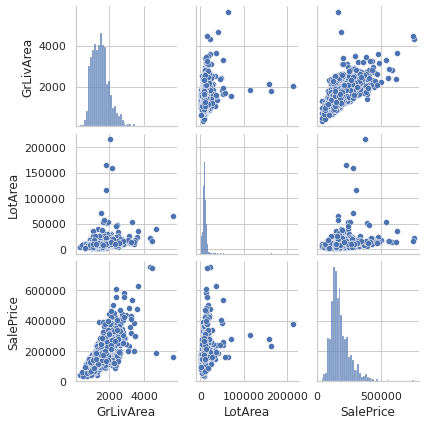

In [16]:
# feature별 관계 시각화로 확인 
sns.set(style='whitegrid', context='notebook')
cols = ['GrLivArea', 'LotArea','SalePrice']
sns.pairplot(df[cols], height=2);

이때, scatterplot에 가장 fit한 직선이 회귀 예측모델이 된다. 여기서 회귀선은 잔차 제곱들의 합인 RSS(혹은 SSE)인 비용함수를 최소화하는 직선이다. 잔차란 예측값과 관측값의 차이이다.(오차(error) : 모집단에서의 예측값과 관측값의 차이)


RSS 비용함수를 최소화 하는 방법을 "OLS" 라고 한다.

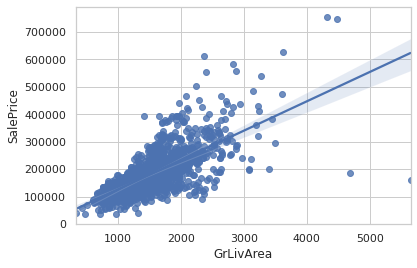

In [17]:
sns.regplot(x=df['GrLivArea'], y=df['SalePrice']);

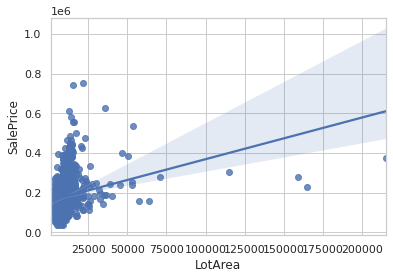

In [18]:
# LotArea특성의 경우 상관관계가 약하지만 회귀선을 확인해보았음.
sns.regplot(x=df['LotArea'], y=df['SalePrice']);


- **선형회귀는 주어진 값이 아닌 값을 예측할 수 있다. = "보간"**
- **기존 데이터 범위를 넘어선 값도 예측할 수 있다. = 외삽**


In [19]:
## GrLivArea > 3500 & GrLivArea < 4500 데이터
#6000 이상 정보 예측 가능
df[(df['GrLivArea'] > 3500) & (df['GrLivArea'] < 4500)]
df[(df['GrLivArea'] > 6000)].sort_values('GrLivArea')

,GrLivArea,LotArea,SalePrice




*   Simple Linear Regression



In [20]:
from sklearn.linear_model import LinearRegression
# 5000 GrLivArea에 대한 Price예측 = 554220달러

model = LinearRegression()

feature = ['GrLivArea']
target = ['SalePrice']
X_train = df[feature]
y_train = df[target]

model.fit(X_train, y_train)

X_test = [[5000]]
y_pred = model.predict(X_test)

y_pred

array([[554220.82068561]])

In [21]:
#전체 GrLivArea에 대한 Price 예측

X_test = [[x] for x in df_t['GrLivArea']]
y_pred = model.predict(X_test)
y_pred

array([[114557.82748987],
       [160945.27292207],
       [193084.38061182],
       ...,
       [149696.58523066],
       [122485.47405334],
       [232829.74378814]])

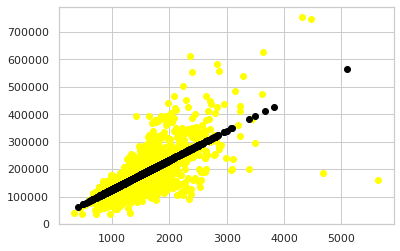

In [22]:
# RSS 비용함수가 최소가 되는 회귀선 그리기
plt.scatter(X_train, y_train, color='yellow')
plt.scatter(X_test, y_pred, color='black')

# 잔차가 최소가 되는 선형회귀선을 구하였음.

In [23]:
# 만든 모델의 계수와 절편에 따른 해석하기
model.coef_

array([[107.13035897]])

x가 1 증가할 때 증가하는 y의 값 

즉, x가 1 증가할 때 y는 107 증가

In [24]:
model.intercept_

array([18569.02585649])

x가 0일때의 y의 값



---

---



**데이터 셋 랜덤하게 나눠서 다중선형회귀모델 수행하기 (기준모델, 단순선형회귀, 다중선형회귀)**

사용 특성
- SalePrice
- GrLivArea
- OverallQual



In [49]:
import pandas as pd
df_all = pd.read_csv('/gdrive/My Drive/Colab Notebooks/HousePrice.csv')

df_all = df_all.set_index(df_all.columns[0])

df_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [50]:
## 데이터 중 75%를 train 데이터로 랜덤하게 나누기 
train = df_all.sample(frac=0.75,random_state=1)
test = df_all.drop(train.index)

In [51]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
258,259,60,RL,80.0,12435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,...,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,RFn,2,564,TA,TA,Y,0,96,0,245,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,231500
267,268,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,SWISU,Norm,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,378,Unf,0,342,720,GasA,...,Y,SBrkr,1052,720,420,2192,0,0,2,1,4,1,Gd,8,Typ,1,Gd,Detchd,1939.0,Unf,1,240,TA,TA,Y,262,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
288,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,...,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,...,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
1233,1234,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,...,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,Abnorml,142000


In [67]:
# 1. 기준모델
target = 'SalePrice'
y_train = train[target]
y_test = test[target]
# SalePrice 평균값으로 예측(기준모델)
predict = y_train.mean()
# 기준모델로 훈련 에러(MAE) 계산
from sklearn.metrics import mean_absolute_error
y_pred = [predict] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)

print(f'훈련 에러: {mae:.2f}')
# 테스트 에러(MAE)
y_pred = [predict] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

훈련 에러: 57775.57
테스트 에러: 55862.90


In [68]:
#2. 단순선형회귀
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features = ['GrLivArea']
X_train = train[features]
X_test = test[features]

# 모델 fit
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

# 테스트 데이터에 적용
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

훈련 에러: 38327.78
테스트 에러: 35476.63


In [70]:
# 3. 다중선형회귀 피처 3개
from sklearn.linear_model import LinearRegression

model = LinearRegression()
features = ['GrLivArea', 
            'OverallQual']
target = 'SalePrice'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [72]:
# 모델 fit
from sklearn.metrics import mean_absolute_error
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')
# 테스트 데이터에 적용해 봅시다 
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

훈련 에러: 29129.58
테스트 에러: 27598.31


기준모델 -> 단순선형회귀 -> 다중선형회귀 순으로 에러가 낮음

In [73]:
# 특성 2개인 모델의 회귀식
b0 = model.intercept_
b1, b2 = model.coef_

print(f'y = {b0:.0f} + {b1:.0f}x\u2081 + {b2:.0f}x\u2082')

y = -102743 + 54x₁ + 33059x₂


- 만든 모델에 대한 평가 수행하기
- 평가지표 해석법 및 장단점
https://velog.io/@tyhlife/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%9A%8C%EA%B7%80-%EB%AA%A8%EB%8D%B8%EC%9D%98-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

In [76]:
# 회귀방정식 평가지표
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
    
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,1.525713e+09
1,MAE,2.759831e+04
2,RMSE,3.906038e+04
3,R2,7.364862e-01
